In [1]:
#Random Forest for Regression
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import pickle

from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.inspection import permutation_importance
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
                                                  

In [2]:
data_for_model = pickle.load(open(r"C:\Users\19144\OneDrive\Desktop\Data Science Infinity\Python Fundamentals\Pickle files\abc_regression_modeling.p", "rb")) #rb for reading a file in


In [3]:
data_for_model

,customer_id,distance_from_store,gender,credit_score,customer_loyalty_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
0,74,3.38,F,0.59,0.263,2563.71,297,44,5,58.266136
1,524,4.76,F,0.52,0.298,2996.02,357,49,5,61.143265
2,607,4.45,F,0.49,0.337,2853.82,350,49,5,58.241224
3,343,0.91,M,0.54,0.873,2388.31,272,54,5,44.227963
4,322,3.02,F,0.63,0.350,2401.64,278,50,5,48.032800
...,...,...,...,...,...,...,...,...,...,...
862,4,2.14,M,0.64,0.564,3499.39,278,47,5,74.455106
865,372,4.38,F,0.50,0.321,3423.01,338,49,5,69.857347
866,104,2.36,F,0.63,0.587,3648.08,280,49,5,74.450612
868,373,0.21,M,0.47,0.972,3303.80,264,51,5,64.780392


In [4]:
data_for_model.drop("customer_id", axis=1, inplace=True) #True so that it is applied

In [5]:
data_for_model

,distance_from_store,gender,credit_score,customer_loyalty_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
0,3.38,F,0.59,0.263,2563.71,297,44,5,58.266136
1,4.76,F,0.52,0.298,2996.02,357,49,5,61.143265
2,4.45,F,0.49,0.337,2853.82,350,49,5,58.241224
3,0.91,M,0.54,0.873,2388.31,272,54,5,44.227963
4,3.02,F,0.63,0.350,2401.64,278,50,5,48.032800
...,...,...,...,...,...,...,...,...,...
862,2.14,M,0.64,0.564,3499.39,278,47,5,74.455106
865,4.38,F,0.50,0.321,3423.01,338,49,5,69.857347
866,2.36,F,0.63,0.587,3648.08,280,49,5,74.450612
868,0.21,M,0.47,0.972,3303.80,264,51,5,64.780392


In [6]:
#Shuffle data
#Best practice step
#This aids us in being sensitive to how data is organized - it may or may not have an impact on the model itself
data_for_model = shuffle(data_for_model, random_state=42)

In [7]:
#Dealing with missing values
data_for_model.isna().sum()

distance_from_store       2
gender                    3
credit_score              2
customer_loyalty_score    0
total_sales               0
total_items               0
transaction_count         0
product_area_count        0
average_basket_value      0
dtype: int64

In [8]:
data_for_model.dropna(how = "any", inplace=True) #If any missing values, then whole row is dropped, True so that it is applied

In [9]:
#Deal with outliers - Decision Trees and RF don't necessarily need this, so this can be omitted
outlier_investigation = data_for_model.describe()

In [10]:
outlier_investigation

,distance_from_store,credit_score,customer_loyalty_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,2.021041,0.596117,0.509589,1846.502538,278.304569,44.926396,4.312183,36.781487
std,2.566045,0.101352,0.294504,1767.829482,214.236424,21.248012,0.725054,19.337336
min,0.000000,0.260000,0.002000,45.950000,10.000000,4.000000,2.000000,9.342000
25%,0.710000,0.530000,0.263000,942.067500,201.000000,41.000000,4.000000,22.406953
50%,1.645000,0.590000,0.510500,1471.490000,258.500000,50.000000,4.000000,30.365417
75%,2.910000,0.660000,0.771500,2104.727500,318.500000,53.000000,5.000000,47.208474
max,44.370000,0.880000,1.000000,9878.760000,1187.000000,109.000000,5.000000,102.335417


In [11]:
data_for_model

,distance_from_store,gender,credit_score,customer_loyalty_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
455,0.28,M,0.81,0.889,990.65,243,53,4,18.691509
621,2.58,F,0.58,0.162,333.26,70,13,4,25.635385
64,0.80,M,0.80,0.956,1753.96,371,52,5,33.730000
456,0.16,M,0.56,0.926,929.57,225,51,4,18.226863
196,3.27,F,0.67,0.297,1904.55,376,36,3,52.904167
...,...,...,...,...,...,...,...,...,...
146,1.34,M,0.57,0.690,1682.14,364,47,4,35.790213
226,1.85,M,0.63,0.242,1787.61,196,53,5,33.728491
588,1.53,F,0.54,0.324,1173.84,193,55,5,21.342545
771,2.28,F,0.45,0.079,70.67,23,4,3,17.667500


In [12]:
#Split input variables and output variables
X = data_for_model.drop(["customer_loyalty_score"], axis=1)
y = data_for_model["customer_loyalty_score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
#Deal with categorical variables
categorical_vars = ["gender"]

one_hot_encoder = OneHotEncoder(sparse=False, drop="first") #Drop first encoded column to avoid dummy trap

X_train_encoded = one_hot_encoder.fit_transform(X_train[categorical_vars]) #Want to use fit transform on training data, but transform only on test data 
#Want encoding rules learned on training, and then applied on testing - rules will remain the same
X_test_encoded = one_hot_encoder.transform(X_test[categorical_vars]) 

encoder_feature_names = one_hot_encoder.get_feature_names_out(input_features=categorical_vars)

# Run for x_train
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder_feature_names)
X_train = pd.concat([X_train.reset_index(drop=True), X_train_encoded.reset_index(drop=True)], axis=1)
X_train.drop(categorical_vars, axis=1, inplace=True)

# Run for x_test
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder_feature_names)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_encoded.reset_index(drop=True)], axis=1)
X_test.drop(categorical_vars, axis=1, inplace=True)


C:\Users\19144\anaconda4\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [14]:
X_train #Gender is coded as dummy variable

,distance_from_store,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value,gender_M
0,0.04,0.67,1191.53,216,53,5,22.481698,1.0
1,2.04,0.64,1581.41,343,41,4,38.570976,0.0
2,2.24,0.63,1327.51,266,48,4,27.656458,0.0
3,1.72,0.59,2094.10,352,34,3,61.591176,1.0
4,0.24,0.53,1133.45,180,56,5,20.240179,1.0
...,...,...,...,...,...,...,...,...
310,0.37,0.61,1397.66,270,50,4,27.953200,1.0
311,2.94,0.62,2397.63,282,52,5,46.108269,0.0
312,2.31,0.53,1805.39,298,48,5,37.612292,0.0
313,2.80,0.41,1524.01,278,45,3,33.866889,0.0


In [15]:
#Model Training

regressor = RandomForestRegressor(random_state = 42)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [16]:
#Predict on the Test Set
y_pred = regressor.predict(X_test)

In [17]:
#Calculate R-Square
r_squared = r2_score(y_test, y_pred)
print(r_squared)

0.9598627943571644


In [18]:
#Cross Validation
#Regression
#We might need to shuffle the data and a random state together
cv = KFold(n_splits = 4, shuffle = True, random_state=42)
cv_scores = cross_val_score(regressor, X_train, y_train, cv=cv, scoring = "r2")
#cv=cv
# Print individual scores for each fold
for i, score in enumerate(cv_scores, start=1):
    print(f"CV Fold {i} Score: {score:.4f}")

print(f"CV Fold Mean Score : {cv_scores.mean()}")


CV Fold 1 Score: 0.8836
CV Fold 2 Score: 0.9342
CV Fold 3 Score: 0.9331
CV Fold 4 Score: 0.9485
CV Fold Mean Score : 0.9248589874052471


In [19]:
#Calculate Adjusted R-square
num_data_points, num_input_vars = X_test.shape

In [20]:
num_data_points #74 rows in test set

79

In [21]:
num_input_vars #8 columns in test set 

8

In [22]:
adjusted_r_squared = 1 - (1- r_squared) * (num_data_points - 1) / (num_data_points - num_input_vars -1)
print(adjusted_r_squared)

0.9552756851408403


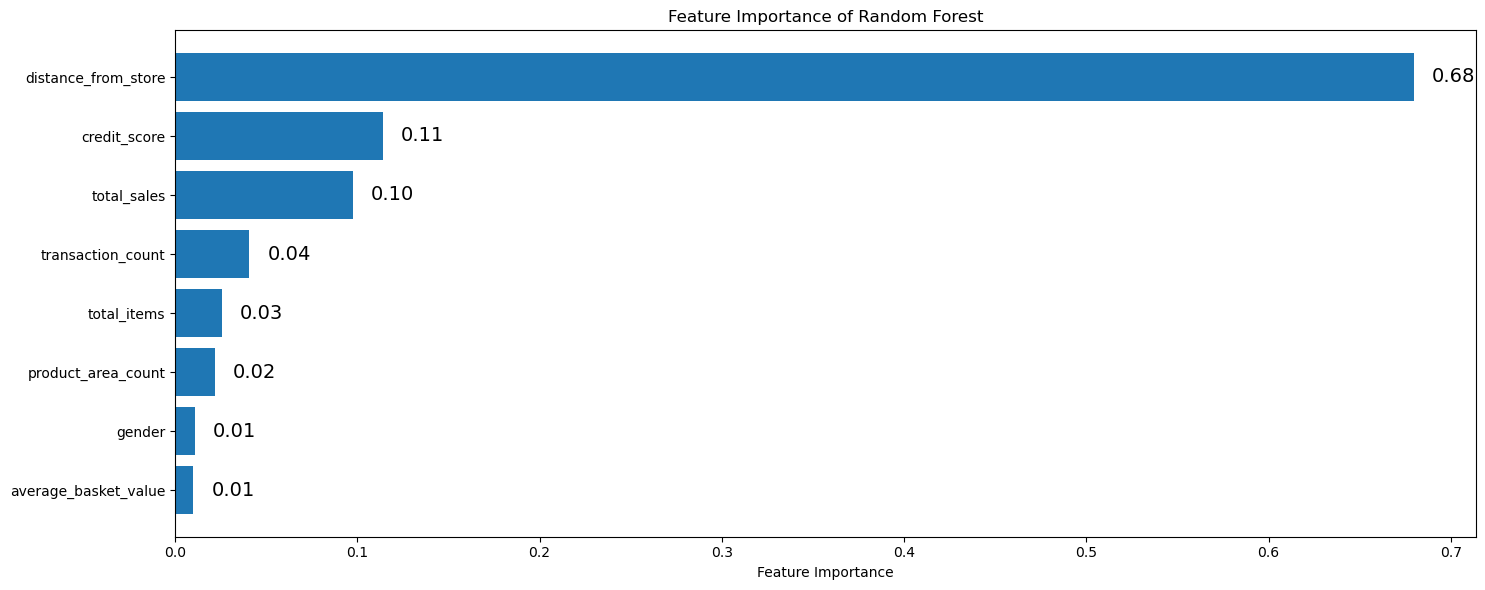

In [27]:
#Feature importance scores

feature_importance = pd.DataFrame(regressor.feature_importances_)
feature_names = pd.DataFrame(X.columns)
feature_importance_summary = pd.concat([feature_names,feature_importance], axis=1)
feature_importance_summary.columns = ["input_variable","feature_importance"]
feature_importance_summary.sort_values(by = "feature_importance", inplace=True)
feature_importance_summary
plt.figure(figsize=(15, 6))  # Adjust the figure size as needed
plt.barh(feature_importance_summary["input_variable"], feature_importance_summary["feature_importance"])
# Add individual bar labels with two decimal places
for i, v in enumerate(feature_importance_summary["feature_importance"]):
    plt.text(v + 0.01, i, f"{v:.2f}", va='center', fontsize=14)
plt.title("Feature Importance of Random Forest")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()

In [29]:
#Permutation importance
#The permutation is seen as decrease in model performance when particular features are randomly shuffled
#Random shuffling destroys any relationship with output variable - gives us a way to understand importance of value - compare shuffling against normal state
#A large decrease means the input variable is very important 
#Preferred over standard feature importance 

result = permutation_importance(regressor, X_test, y_test, n_repeats=10, random_state=42)
result
#For each of the 8 variables, there are 10 iterations

{'importances_mean': array([1.45815078e+00, 1.27463198e-03, 1.18714590e-01, 1.29790448e-01,
        1.74368314e-02, 4.40707405e-02, 8.22511134e-03, 4.00298537e-03]),
 'importances_std': array([0.1803007 , 0.00124786, 0.02175463, 0.00978399, 0.00387002,
        0.00931063, 0.00327316, 0.00149292]),
 'importances': array([[ 1.35805446e+00,  1.33153690e+00,  1.23947045e+00,
          1.15372568e+00,  1.67458047e+00,  1.50216533e+00,
          1.70916672e+00,  1.49599713e+00,  1.44612233e+00,
          1.67068834e+00],
        [ 1.28814398e-03,  1.61237588e-03,  4.33736701e-04,
          1.63969324e-03,  5.96202645e-04,  3.81532598e-03,
         -1.27024759e-03,  1.87601088e-03,  2.02644321e-03,
          7.28634921e-04],
        [ 1.01896138e-01,  1.28003609e-01,  1.67307696e-01,
          1.20421584e-01,  1.30874769e-01,  1.03604171e-01,
          8.31711550e-02,  1.06843535e-01,  1.12764762e-01,
          1.32258481e-01],
        [ 1.17741079e-01,  1.41796746e-01,  1.29612448e-01,
     

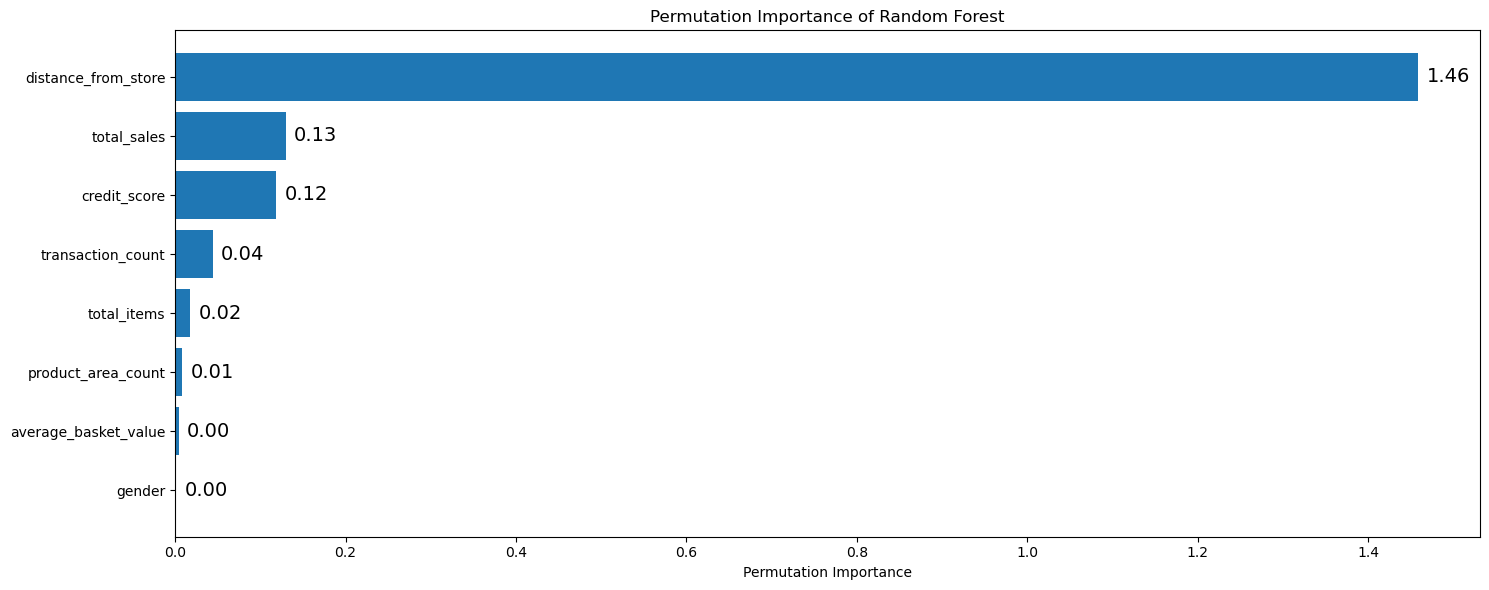

In [30]:
permutation_importance = pd.DataFrame(result["importances_mean"])
feature_names = pd.DataFrame(X.columns)
permutation_importance_summary = pd.concat([feature_names,permutation_importance], axis=1)
permutation_importance_summary.columns = ["input_variable","permutation_importance"]
permutation_importance_summary.sort_values(by = "permutation_importance", inplace=True)
permutation_importance_summary
plt.figure(figsize=(15, 6))  # Adjust the figure size as needed
plt.barh(permutation_importance_summary["input_variable"], permutation_importance_summary["permutation_importance"])
# Add individual bar labels with two decimal places
for i, v in enumerate(permutation_importance_summary["permutation_importance"]):
    plt.text(v + 0.01, i, f"{v:.2f}", va='center', fontsize=14)
plt.title("Permutation Importance of Random Forest")
plt.xlabel("Permutation Importance")
plt.tight_layout()
plt.show()

In [31]:
#Predictions under the hood
X_test

,distance_from_store,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value,gender_M
0,2.27,0.49,1506.49,281,47,3,32.052979,0.0
1,3.02,0.63,2401.64,278,50,5,48.032800,0.0
2,2.72,0.57,1620.52,246,53,5,30.575849,0.0
3,1.51,0.67,1785.67,331,53,5,33.691887,1.0
4,1.34,0.57,1682.14,364,47,4,35.790213,1.0
...,...,...,...,...,...,...,...,...
74,1.66,0.64,1811.00,344,48,4,37.729167,1.0
75,0.18,0.78,914.98,220,52,4,17.595769,1.0
76,4.02,0.48,322.92,81,13,4,24.840000,0.0
77,0.16,0.56,929.57,225,51,4,18.226863,1.0


In [32]:
y_pred[0] #For first customer, the loyalty score was predicted as this:

0.22624000000000016

In [33]:
new_data = [X_test.iloc[0]]

In [34]:
new_data #Data for one customer

[distance_from_store        2.270000
 credit_score               0.490000
 total_sales             1506.490000
 total_items              281.000000
 transaction_count         47.000000
 product_area_count         3.000000
 average_basket_value      32.052979
 gender_M                   0.000000
 Name: 0, dtype: float64]

In [35]:
regressor.estimators_ #All decision tree objects in random forest model

[DecisionTreeRegressor(max_features=1.0, random_state=1608637542),
 DecisionTreeRegressor(max_features=1.0, random_state=1273642419),
 DecisionTreeRegressor(max_features=1.0, random_state=1935803228),
 DecisionTreeRegressor(max_features=1.0, random_state=787846414),
 DecisionTreeRegressor(max_features=1.0, random_state=996406378),
 DecisionTreeRegressor(max_features=1.0, random_state=1201263687),
 DecisionTreeRegressor(max_features=1.0, random_state=423734972),
 DecisionTreeRegressor(max_features=1.0, random_state=415968276),
 DecisionTreeRegressor(max_features=1.0, random_state=670094950),
 DecisionTreeRegressor(max_features=1.0, random_state=1914837113),
 DecisionTreeRegressor(max_features=1.0, random_state=669991378),
 DecisionTreeRegressor(max_features=1.0, random_state=429389014),
 DecisionTreeRegressor(max_features=1.0, random_state=249467210),
 DecisionTreeRegressor(max_features=1.0, random_state=1972458954),
 DecisionTreeRegressor(max_features=1.0, random_state=1572714583),
 De

In [36]:
predictions = []
tree_count = 0
for tree in regressor.estimators_:
    prediction = tree.predict(new_data)[0]
    predictions.append(prediction)
    tree_count += 1

In [37]:
predictions #100 predictions for the first customer across decision trees

[0.201,
 0.668,
 0.117,
 0.17,
 0.203,
 0.268,
 0.17,
 0.203,
 0.23400000000000004,
 0.17,
 0.234,
 0.12,
 0.234,
 0.174,
 0.147,
 0.352,
 0.268,
 0.234,
 0.234,
 0.234,
 0.203,
 0.17400000000000002,
 0.17,
 0.234,
 0.177,
 0.12,
 0.314,
 0.174,
 0.234,
 0.302,
 0.352,
 0.314,
 0.234,
 0.174,
 0.116,
 0.221,
 0.147,
 0.177,
 0.203,
 0.147,
 0.12,
 0.234,
 0.234,
 0.201,
 0.177,
 0.221,
 0.203,
 0.366,
 0.201,
 0.334,
 0.366,
 0.17,
 0.448,
 0.12,
 0.234,
 0.136,
 0.23400000000000004,
 0.17,
 0.174,
 0.201,
 0.147,
 0.201,
 0.366,
 0.344,
 0.221,
 0.17400000000000002,
 0.234,
 0.177,
 0.17,
 0.12,
 0.42,
 0.344,
 0.12,
 0.221,
 0.17,
 0.234,
 0.17,
 0.203,
 0.234,
 0.234,
 0.314,
 0.234,
 0.234,
 0.143,
 0.17,
 0.234,
 0.201,
 0.12,
 0.174,
 0.201,
 0.35200000000000004,
 0.234,
 0.174,
 0.506,
 0.177,
 0.352,
 0.352,
 0.147,
 0.234,
 0.201]

In [38]:
sum(predictions) / tree_count #Exactly the same as what we got before

0.22624000000000016

In [43]:
with open("C:\\Users\\19144\\OneDrive\\Desktop\\Data Science Infinity\\Python Fundamentals\\Pickle files\\random_forest_regression.p", "wb") as f:
    pickle.dump(regressor, f)
with open("C:\\Users\\19144\\OneDrive\\Desktop\\Data Science Infinity\\Python Fundamentals\\Pickle files\\random_forest_onehotencoder.p", "wb") as f:
    pickle.dump(one_hot_encoder, f)